In [61]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Linear Regression

### Objective function

$$
\underset{w}{min}\Vert Xw-y\Vert_2^2
$$  
where:  
$X \in \mathbb{R}^{mxn}$,  
$w \in \mathbb{R}^n$,  
$y \in \mathbb{R}^m$

### Simple convex function

$$ \mathcal{f}(x)=x^2$$
where:  
$x,\mathcal{f}(x) \in \mathbb{R}$

In [62]:
x = np.linspace(-100, 100, num=201)

In [63]:
f_x = [i**2 for i in x]

In [64]:
f_x = x ** 2

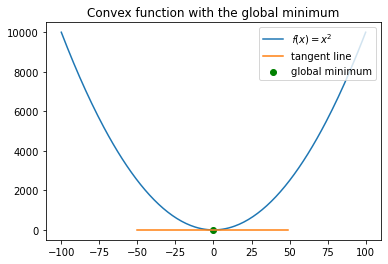

In [65]:
plt.plot(x, f_x, label=r'$\mathcal{f}(x)=x^2$');
plt.plot(x[50:150], np.zeros(len(x[50:150])), label='tangent line');
plt.scatter(0, 0, label='global minimum', color='green');

plt.legend(loc='upper right')
plt.title('Convex function with the global minimum');

### Loss function as a composition of functions

$$L(x) \circ x(w)= \Vert Xw-y\Vert_2^2$$ 
where:  
$L: \mathbb{R}^m \to \mathbb{R}$  
$L(x) = \Vert x \Vert_2^2$  
and  
$x: \mathbb{R}^n \to \mathbb{R}^m$  
$x(w) = Xw-y$

$$\frac{\partial L}{\partial w} = \frac{\partial L(x)}{\partial x}\frac{\partial x(w)}{\partial w}$$

### Euclidean distance

$ \Vert x\Vert_2^2 = 
\left(
\sqrt{\sum \limits_{j=1}^{m}\vert x_j\vert^2}
\right)^2
=\sum \limits_{j=1}^{m}\vert x_j\vert^2 = x_1^2 + x_2^2 + \dots + x_m^2
$

### Gradient of Euclidean distance

$$
\frac{d L}{d x}=
\left[
\begin{array}{cccc}
2x_1&2x_2&\dots&2x_m
\end{array}
\right]= 
2x, \in \mathbb{R}^{mx1}
$$

### Difference between predicted target and observed target

$$x(w) = Xw-y$$

### Partial derivative of the above

$$\frac{\partial x}{\partial w} = X - 0 = X, \in \mathbb{R}^{mxn}$$

### Chain rule

$$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial x}\frac{\partial x}{\partial w}=2xX, x \in \mathbb{R}^{nx1}, X \in \mathbb{R}^{mxn}$$

$$\frac{\partial L}{\partial w} = 2x^T X = 2(X^Tw^T-y^T)X$$

### Global minimum

$2(X^Tw^T-y^T)X=0$  


1. $\quad 2X^TXw^T - 2y^TX=0$  
2. $\quad 2X^TXw^T=2y^TX$  
3. $\quad X^TXw^T=y^TX$  
4. $\quad w^T = y^TX (X^TX)^{-1} $

### Intercept

$$Intercept = y_{\mu} - X_{\mu}w^T$$
where:  
$y_{\mu}$ - mean value of a target vector  
$X_{\mu}$ - vector of mean values for each column vector in the design matrix  
$w^T$ - coefficients

$$\hat{y} = w_0 + \sum \limits_{i=1} ^{n}w_i \vec{x_i}$$
where:  
$\hat{y}$ - predicted target  
$w_0$ - intercept  
$w_i$ - coefficients  
$\vec{x_i}$ - feature vectors

### Coefficient of determination

$$ 1 - \frac{\sum \limits_{i=1} ^{n} (y_i - \hat{y_i})^2}
{\sum \limits_{i=1} ^{n} (y_i - y_{\mu})^2}$$
where:  
$y_i$ - observed target  
$\hat{y_i}$ - predicted target  
$y_{\mu}$ - mean of vector of observed targets

### Linear Regression class

In [66]:
import numpy as np
class LinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        
        X = X.astype(float)
        y = y.astype(float)
        
        if self.fit_intercept == True:

            X_average = np.mean(X, axis=0)
            X = X - X_average
            y_average = np.mean(y)
            y = y - y_average
            var1 = np.dot(y.T, X)
            var2 = np.dot(X.T, X)
            var3 = np.linalg.inv(var2)
            self.coef = np.dot(var1, var3)
            self.intercept = y_average - np.dot(X_average, self.coef.T)
        else:
            var1 = np.dot(y.T, X)
            var2 = np.dot(X.T, X)
            var3 = np.linalg.inv(var2)
            self.coef = np.dot(var1, var3)
            self.intercept = 0
         
        return self
    
    def predict(self, X):
        
        y_pred = np.dot(X, self.coef.T) + self.intercept    
        return y_pred
    
    def score(self, X, y):
        
        y_pred = self.predict(X)
        numerator = ((y - y_pred)**2).sum()
        denominator = ((y - np.mean(y))**2).sum()
        score = 1 - (numerator/denominator)
        return score

In [67]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)
r2 = reg.score(X_train, y_train)
r2_test = reg.score(X_test, y_test)
print('Coefficient of determination\nTraining set')
print('--------------------------')
print(r2)
print('__________________________')
print('Coefficient of determination\nTesting set')
print('--------------------------')
print(r2_test)

Coefficient of determination
Training set
--------------------------
0.5150681322017461
__________________________
Coefficient of determination
Testing set
--------------------------
0.5164122278603756
